# Linear regression

In [35]:
import numpy as np

In [52]:
def get_random_points(n):
    return np.random.uniform(-1, 1, [n, 2])

def get_random_line_vector():
    rp = np.random.uniform(-1, 1, (2, 2)) 
    slope = (rp[0, 1] - rp[1, 1]) / (rp[0, 0] - rp[1, 0])
    intercept = rp[0, 1] - rp[0, 0] * slope
    return [intercept, slope, 1]    

In [69]:
def get_labels(pi, fx_vector):
    labels = np.sign(np.dot(pi, fx_vector))
#     labels = pi[:, 2] + pi[:, 1] * fx_vector[1] + pi[:, 0] * fx_vector[0] >= 0
#     labels = np.where(labels, 1, -1)
    return labels

def get_plot_points_from_vector(vector):
    x = np.array([-1, 1])
    y = (- vector[1] * x - vector[0]) / vector[2]
    return (x, y)

In [70]:
import matplotlib.pyplot as plt
import time
from IPython import display

def update_plot(points, labels, fx_vector, gx_vector):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_ylim([-1,1])
    ax1.set_xlim([-1,1])

    x = points[:, 0]
    y = points[:, 1]
    ax1.scatter(x[labels==1], y[labels==1], s=30, c='b', marker='+')
    ax1.scatter(x[labels==-1],y[labels==-1], s=30, c='r', marker="_")

    gx_x, gx_y  = get_plot_points_from_vector(gx_vector)
    ax1.plot(gx_x, gx_y, 'k', lw=2)

    fx_x, fx_y = get_plot_points_from_vector(fx_vector)
    ax1.plot(fx_x, fx_y, 'g', lw=2)

    plt.show()

In [71]:
def add_intercept(points):
    pi = np.array([[1, x1, x2] for (x1, x2) in points])
    return pi

def solve_linear_regression(pi, labels):
    return np.dot(np.dot(np.linalg.pinv(np.dot(pi.T, pi)), pi.T), labels)
#     return np.dot(np.linalg.pinv(pi), labels)

In [72]:
def get_linear_regression_error(pi, labels, gx_vector):
    predictions = np.sign(np.dot(pi, gx_vector))
#     predictions = pi[:, 2] * gx_vector[2] + pi[:, 1] * gx_vector[1] + pi[:, 0] * gx_vector[0]  >= 0
#     predictions = np.where(predictions, 1, -1)
    return sum ((labels * predictions) < 0) / len(labels)

0.027


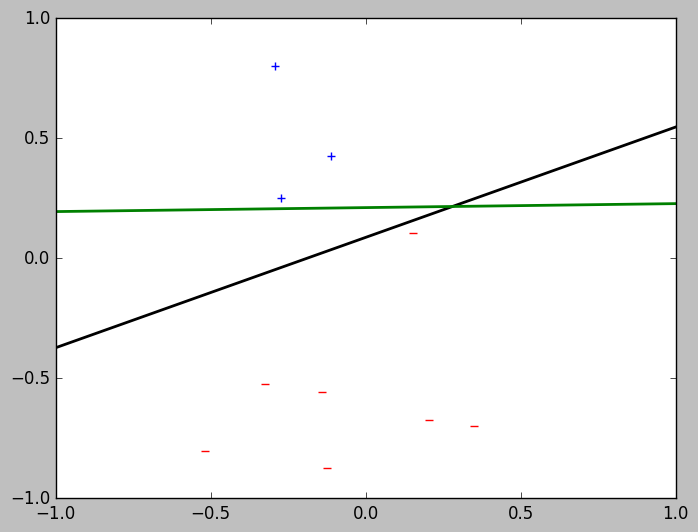

In [75]:
error = 0
N = 10
RUNS = 1000

# def run_experiment(n = 100):
for i in range (RUNS):
    points = get_random_points(N)
    fx_vector= get_random_line_vector()
    pi = add_intercept(points)
    points = pi[:, 1:3]
    labels = get_labels(pi, fx_vector)
    gx_vector = solve_linear_regression(pi, labels)
    error += get_linear_regression_error(pi, labels, gx_vector)

print(error/RUNS)
update_plot(points, labels, fx_vector, gx_vector)